In [83]:
import pandas as pd
import numpy as np
import matplotlib
acc_details_df = pd.read_json('accelerometer_details.json')
gyro_details_df = pd.read_json('gyroscope_details.json')

# Sort by timestamp while preserving measurementId
acc_details_df.sort_values(by=['measurementId', 'timestampUtc'], ascending=[True, True], inplace=True)
gyro_details_df.sort_values(by=['measurementId', 'timestampUtc'], ascending=[True, True], inplace=True)




In [87]:
# Time difference between measurements

acc_details_df['diff'] = acc_details_df.groupby(['measurementId'])['timestampUtc'].diff()
gyro_details_df['diff'] = gyro_details_df.groupby(['measurementId'])['timestampUtc'].diff()

difference_info_df = pd.DataFrame()
difference_info_df["acc_max"] = acc_details_df.groupby('measurementId')["diff"].max()
difference_info_df["acc_min"] = acc_details_df.groupby('measurementId')["diff"].min()
difference_info_df["gyro_max"] = gyro_details_df.groupby('measurementId')["diff"].max()
difference_info_df["gyro_min"] = gyro_details_df.groupby('measurementId')["diff"].min()
# This is not supported by pandas:
# difference_info_df["average"] = acc_details_df.groupby('measurementId')["diff"].mean()
# So instead global average must be enough
print("Time difference between measurements")
print(difference_info_df)
print(f"Acc average: {acc_details_df['diff'].mean()}")
print(f"Acc max: {acc_details_df['diff'].max()}")
print(f"Acc min: {acc_details_df['diff'].min()}")
print(f"Gyro average: {gyro_details_df['diff'].mean()}")
print(f"Gyro max: {gyro_details_df['diff'].max()}")
print(f"Gyro min: {gyro_details_df['diff'].min()}")



Time difference between measurements
                             acc_max                acc_min  \
measurementId                                                 
1             0 days 00:00:00.152000 0 days 00:00:00.018000   
3             0 days 00:00:00.139000 0 days 00:00:00.005000   
4             0 days 00:00:00.111000 0 days 00:00:00.075000   
5             0 days 00:00:00.111000 0 days 00:00:00.075000   
6             0 days 00:00:00.111000 0 days 00:00:00.075000   
7             0 days 00:00:00.111000 0 days 00:00:00.075000   
8             0 days 00:00:00.111000 0 days 00:00:00.075000   
9             0 days 00:00:00.185000 0 days 00:00:00.009000   
11            0 days 00:00:00.149000 0 days 00:00:00.009000   
13            0 days 00:00:00.181000 0 days 00:00:00.018000   
14            0 days 00:00:00.135000 0 days 00:00:00.043000   
15            0 days 00:00:00.136000 0 days 00:00:00.026000   
16            0 days 00:00:00.136000 0 days 00:00:00.008000   
18            0 da

Acc histogram


<AxesSubplot:>

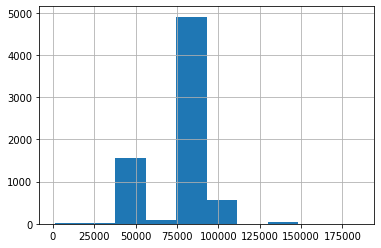

In [88]:
print("Acc histogram")
acc_details_df['diff'].dt.microseconds.hist()

Gyro histogram


<AxesSubplot:>

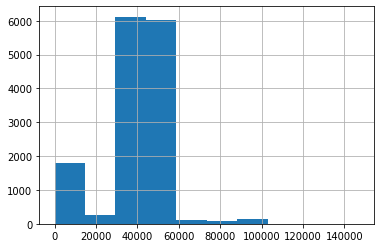

In [89]:
print("Gyro histogram")
gyro_details_df['diff'].dt.microseconds.hist()